# Atlanta Forest Age Mapping - Fall 2025 Take-Home Project
## Starter Notebook Template

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# import rasterio
# from rasterio.plot import show

## Load Data

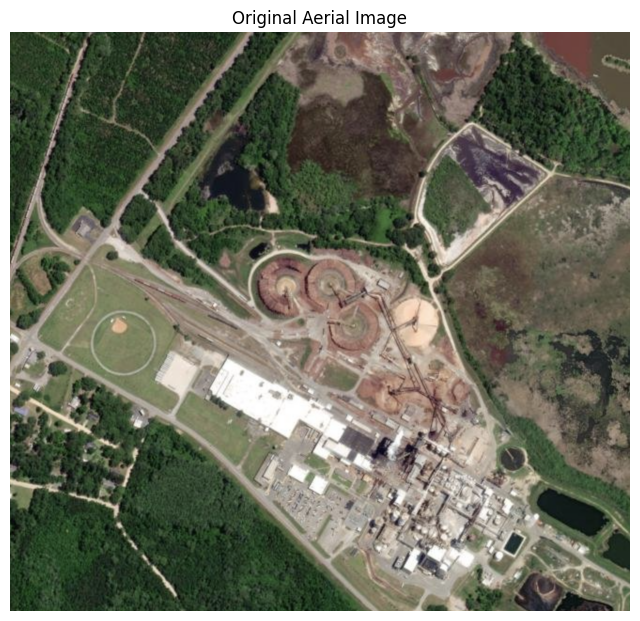

In [14]:
# Replace this with your own aerial imegery
image_path = "test.png"
img = cv2.imread(image_path)

# convert to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.title("Original Aerial Image")
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


# Preprocessing

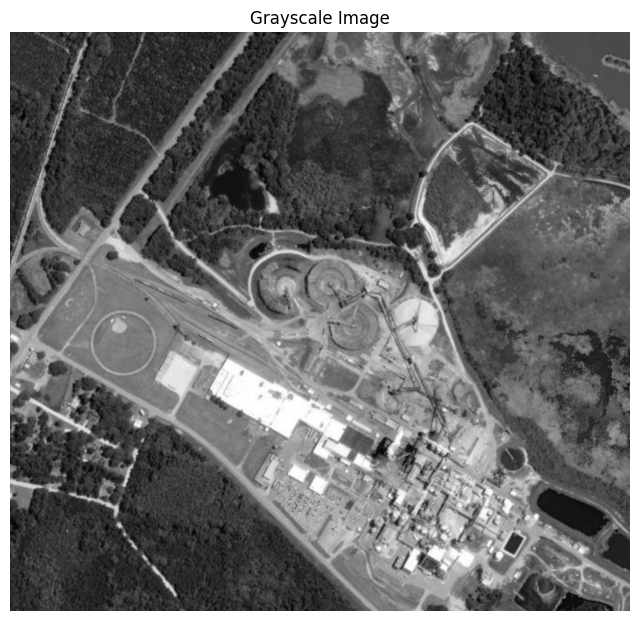

In [15]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.title("Grayscale Image")
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

# Add preprocessing steps here: blur, histogram equalization,...

# Baseline Forest Classification

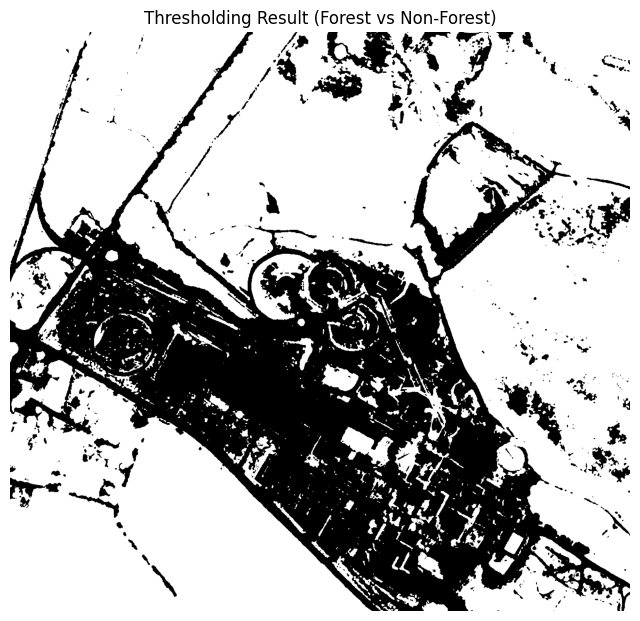

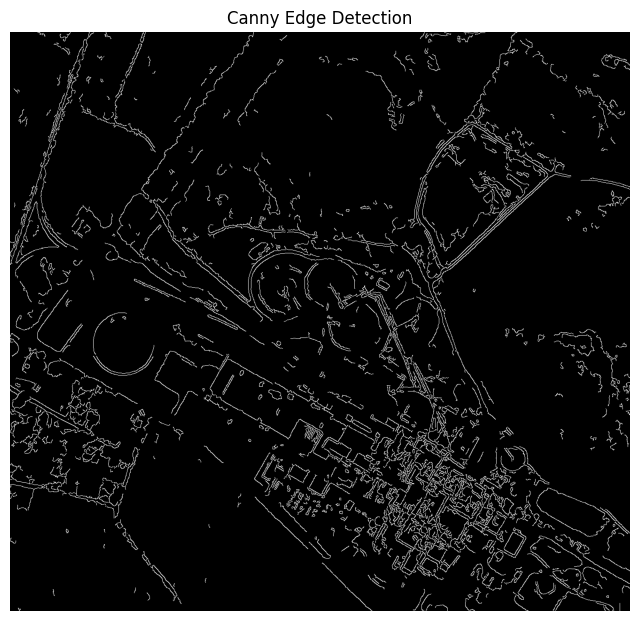

/Users/jiwonp2003/Documents/UGA_AI/Take_Home_Project/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jiwonp2003/Documents/UGA_AI/Take_Home_Project/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jiwonp2003/Documents/UGA_AI/Take_Home_Project/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


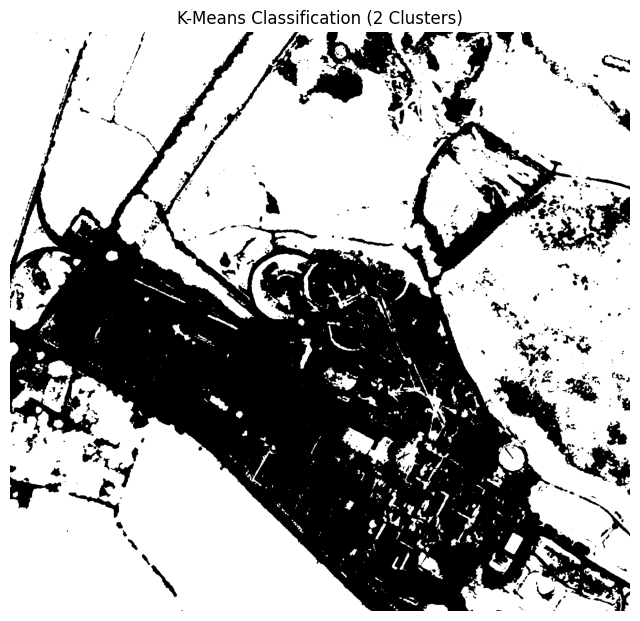

In [18]:
# Method 1: Thresholding 
# Simple global thresholding (should tweak values)
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(8, 8))
plt.title("Thresholding Result (Forest vs Non-Forest)")
plt.imshow(thresh, cmap="gray")
plt.axis("off")
plt.show()


# Method 2: Edge/Texture (Canny Edge Detection)
edges = cv2.Canny(gray, 100, 200)

plt.figure(figsize=(8, 8))
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()


# Method 3: Clustering (K-Means on pixel intensity)
pixels = gray.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=42).fit(pixels)
labels = kmeans.labels_.reshape(gray.shape)

plt.figure(figsize=(8, 8))
plt.title("K-Means Classification (2 Clusters)")
plt.imshow(labels, cmap="gray")
plt.axis("off")
plt.show()


# Machine Learning Classifier
Example: Train a simple classifier on pixel values
Create labels manually for a few points (forest vs non-forest)

In [ ]:

# Replace with real labels if attempting this step
X = pixels[:5000]  # sample pixels
y = np.random.randint(0, 2, size=5000) # (dummy data) 0=non-forest, 1=forest)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred))

